# k-NN

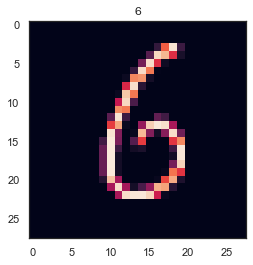

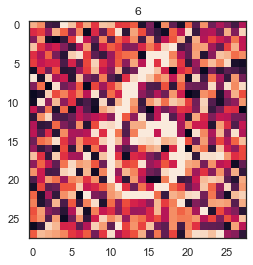

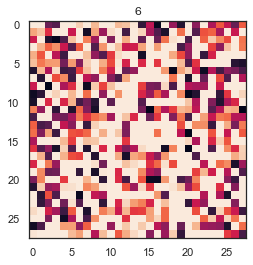

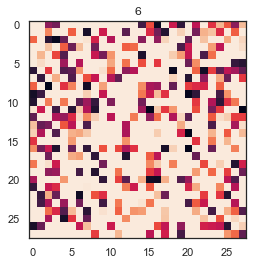

In [286]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


dat_clean = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset.txt")
dat_light = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-Light-Corruption.txt")
dat_medium = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-Moderate-Corruption.txt")
dat_heavy = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-Heavy-Corruption.txt")

labels = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-labels.txt").astype(int)



dat_clean = np.array_split(dat_clean,len(dat_clean)//784)
dat_light = np.array_split(dat_light,len(dat_light)//784)
dat_medium = np.array_split(dat_medium,len(dat_medium)//784)
dat_heavy = np.array_split(dat_heavy,len(dat_heavy)//784)


def img(data,i):
    return data[i].reshape((28,28))

def show(data,i):
    plt.imshow(img(data,i).T)
    plt.title(labels[i])
    plt.show()

k = 3
show(dat_clean,k)
show(dat_light,k)
show(dat_medium,k)
show(dat_heavy,k)

In [287]:
dat = dat_clean

N = 100

def dist(x1,x2):
    return (x1-x2).T@(x1-x2)

def knn(i):
    dists = dist(np.array(dat[:N]).T, np.tile(dat[i],(N,1)).T)
    dists = np.diag(dists)
    
    nbs = labels[np.argsort(dists)][:50]
    
    guesses = np.cumsum(nbs)/np.arange(1,len(nbs)+1)
    return np.round(guesses)


def loss(y_pred,y_true):
    return 1-np.equal(y_pred, y_true)

def loss_n(n):
    return loss(knn(n),labels[n])



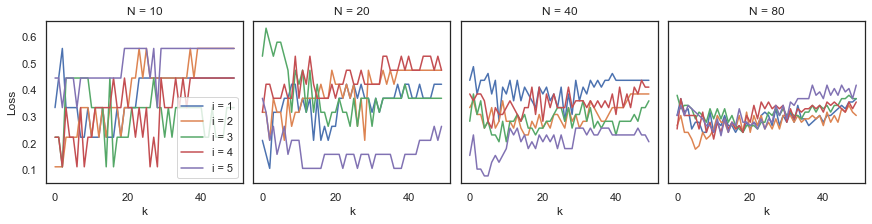

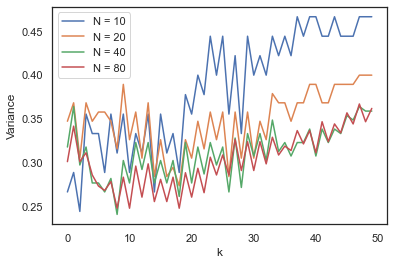

In [295]:
fig, axs = plt.subplots(1,4,figsize = (12,3),constrained_layout = 1,sharey=True)

axs[0].set_ylabel("Loss")
means = []

Ns = [10,20,40,80]
for ind in range(len(Ns)):
    n = Ns[ind]
    
    ls = []
    for i in range(1,6):
        losses = array([loss_n(k) for k in range(100 + i*n + 1, 100 + (i+1)*n)])
        losses = np.mean(losses,axis = 0)
        ls.append(losses)
        axs[ind].plot(losses,label = f"i = {i}")
    means.append(np.mean(ls,axis = 0))
    axs[ind].set_title(f"N = {n}")
    axs[ind].set_xlabel("k")
    
axs[0].legend()

plt.show()
for i, m in enumerate(means):
    plt.plot(m,label = f"N = {Ns[i]}")

plt.xlabel("k")
plt.ylabel("Variance")

plt.legend()
plt.show()


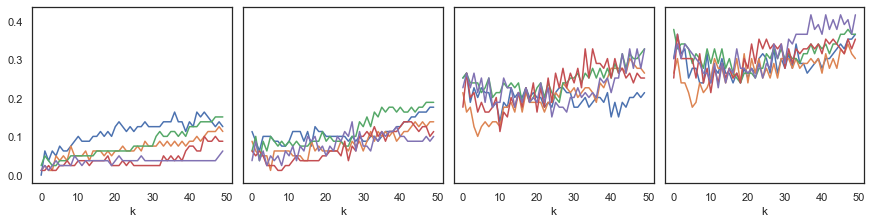

In [296]:
def make_plot(ax):
    n = 80
    for i in range(1,6):
        losses = array([loss_n(k) for k in range(100 + i*n + 1, 100 + (i+1)*n)])
        losses = np.mean(losses,axis = 0)
        ax.plot(losses,label = f"i = {i}")
    ax.set_xlabel("k")

fig, axs = plt.subplots(1,4,figsize = (12,3),constrained_layout = 1,sharey=True)


# BAAAAD coding practice!
dat = dat_clean
make_plot(axs[0])
axs[0].set_ylabel("Loss")

dat = dat_light
make_plot(axs[1])

dat = dat_medium
make_plot(axs[2])

dat = dat_heavy
make_plot(axs[3])


plt.show()

# Linear Regression